In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
train_df = pd.read_csv('../../data/raw/HappyDB.csv')
train_df
train_df=train_df[~train_df['ground_truth_category'].isnull()]
vectorizer = TfidfVectorizer(max_features=3000)

In [65]:
tf_idf_vectorized = vectorizer.fit_transform(train_df['cleaned_hm'])
df_tfdf = pd.DataFrame(tf_idf_vectorized.todense(), columns=vectorizer.get_feature_names_out())

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    df_tfdf, train_df['ground_truth_category'], test_size=0.2, random_state=10)

In [68]:
train_df = pd.read_csv('../../data/raw/happiness_index/HappyDB.csv')
# model building
train_df=train_df[~train_df['ground_truth_category'].isnull()]
vectorizer = TfidfVectorizer(max_features=3000)
tf_idf_vectorized = vectorizer.fit_transform(train_df['cleaned_hm'])
df_tfdf = pd.DataFrame(tf_idf_vectorized.todense(), columns=vectorizer.get_feature_names())
X_train, X_test, y_train, y_test = train_test_split(
    df_tfdf, train_df['ground_truth_category'], test_size=0.2, random_state=10)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [69]:
accuracy_score(model.predict(X_train),y_train)

0.8636283185840707

In [105]:
X_test

,00,000,00am,10,100,1000,10class,10th,11,12,...,you,young,younger,youngest,your,yourself,youtube,yummy,zelda,zoo
13525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
7745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.124407,0.0,0.0,0.0,0.432728,0.195682,0.0,0.0,0.0,0.0
1887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
9768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
6836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [70]:
accuracy_score(model.predict(X_test),y_test)

0.8247787610619469

In [71]:
summary_coef=pd.DataFrame(model.coef_,index=model.classes_,columns=df_tfdf.columns).T

In [72]:
summary_coef.sort_values('achievement',ascending=False).head(50)

,achievement,affection,bonding,enjoy_the_moment,exercise,leisure,nature
job,4.294376,-2.314630,-1.035090,-2.686917,-0.783621,-2.003966,-0.737477
won,3.885812,-1.457271,-0.968707,-1.163788,-0.701735,-1.732639,-0.742481
finished,3.645385,-2.315794,-1.449443,-1.250770,0.025718,-1.026573,-0.736659
able,3.370066,-1.046313,-0.911067,-2.296242,0.936675,-0.461441,-0.141051
money,3.071950,-1.301142,-0.475645,-1.215555,-0.602302,-1.727390,-0.617218
college,2.913563,-0.772584,0.286334,-0.389395,-0.561978,-2.614915,-0.454352
work,2.900781,-2.746142,-0.343755,0.114234,-0.389430,-1.335895,-1.145924
boss,2.881889,-2.327709,0.649705,-0.926670,-0.176132,-0.478542,-0.177525
cleaned,2.780545,-1.410099,-0.194623,-1.048223,-0.217713,-0.388372,-0.389952
company,2.629723,-1.456829,0.465553,-1.379966,-0.246048,-0.498575,-0.286292


In [73]:
tf_idf_vectorized = vectorizer.fit_transform(train_df['cleaned_hm'])
tf_idf_vectorized

<14125x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 188983 stored elements in Compressed Sparse Row format>

### Happiness Score of HappyDB

In [74]:
index = pd.read_csv('../../data/raw/happiness_index/labMIT1.csv')

In [75]:
import nltk
import pandas as pd
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
class happiness_score_area:
    def __init__(self, h_dict, whole_words):
        self.words = whole_words
        self.h_dict = {}
        self.total_count = 0
        for w in self.words:
            if w in h_dict:
                self.total_count += 1
                if w not in self.h_dict:
                    self.h_dict[w] = {}
                    self.h_dict[w]['score'] = h_dict[w]
                    self.h_dict[w]['count'] = 1
                else:
                    self.h_dict[w]['count'] += 1

    def scoring(self, words):
        score = 0
        length = 0
        for w in words:
            if w in self.h_dict:
                score += self.h_dict[w]['score']
                length += 1
        if length != 0:
            return score / length
        return 0

In [77]:
happydb = pd.read_csv('../../data/raw/HappyDB.csv')
happydb

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding


In [78]:
happydb = pd.read_csv('../../data/raw/HappyDB.csv')
stop_words = stopwords.words("english")
filter_words = stop_words + ["'s", "#","'", "``", "-", "(", ")", '"', "-", ":", "|", "/", "@",".","%"]
def create_tokens(text):
    # process words
    tokenized_words = word_tokenize(text)
    return tokenized_words
happydb['token'] = happydb['cleaned_hm'].apply(create_tokens)

In [79]:
words =[]
for i, row in happydb.iterrows():
    words += row["token"]

In [80]:
h_index = pd.read_csv('../../data/raw/happiness_index/labMIT1.csv') #keep neutral words
h_index = h_index.loc[(h_index['happiness_average'] >= 5.5) | (h_index['happiness_average'] <= 4.5)] #eliminate neutral words
h_index = h_index[['#word', 'happiness_average']]
h_index.set_index(keys='#word', inplace=True)
h_dict = h_index.to_dict()['happiness_average']

In [81]:
hs=happiness_score_area(h_dict, words)
happydb['h_score'] = happydb['token'].apply(hs.scoring)
happydb

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,token,h_score
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,"[I, went, on, a, successful, date, with, someo...",6.216667
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,"[I, was, happy, when, my, son, got, 90, %, mar...",6.373333
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,"[I, went, to, the, gym, this, morning, and, di...",6.285000
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,"[We, had, a, serious, talk, with, some, friend...",6.029091
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,"[I, went, with, grandchildren, to, butterfly, ...",6.630000
...,...,...,...,...,...,...,...,...,...,...,...
100530,128762,112,24h,My husband announced he is getting a decent bo...,My husband announced he is getting a decent bo...,True,1,NaN,affection,"[My, husband, announced, he, is, getting, a, d...",6.352000
100531,128763,714,24h,Had a can of Pepsi to drink.,Had a can of Pepsi to drink.,True,1,NaN,enjoy_the_moment,"[Had, a, can, of, Pepsi, to, drink, .]",5.990000
100532,128764,3934,24h,Cuddling with my girlfriend last night.,Cuddling with my girlfriend last night.,True,1,affection,affection,"[Cuddling, with, my, girlfriend, last, night, .]",5.776000
100533,128765,1629,24h,I had a great meeting yesterday at work with m...,I had a great meeting yesterday at work with m...,True,1,NaN,bonding,"[I, had, a, great, meeting, yesterday, at, wor...",6.191250


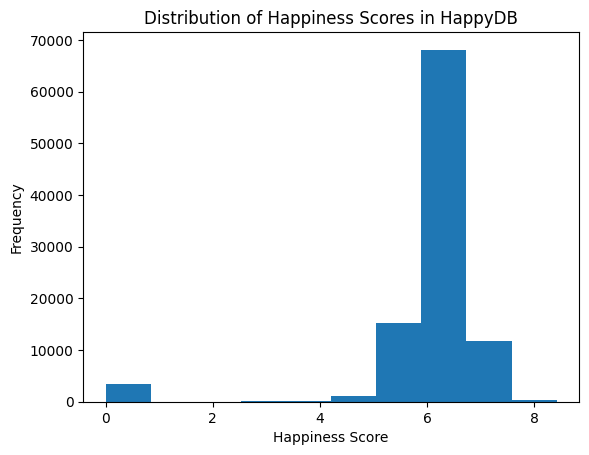

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(happydb['h_score'])
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores in HappyDB')
plt.show()

In [83]:
happydb2 = happydb[happydb['h_score'] !=0]

In [84]:
import numpy as np

# Get the 95% quantile of the 'data_column' column

quantile_05 = happydb2['h_score'].quantile(0.05)

print("95% quantile:", quantile_05)
print("Hence, we will predict the label tweets which's happiness score is higher than 5.4763")

95% quantile: 5.476318181818182
Hence, we will predict the label tweets which's happiness score is higher than 5.4763


### Prediction with tweets

In [85]:
path = '../../data/raw/sample_tweets.json'

In [86]:
import json
from datetime import datetime       

f = open(path)
data = json.load(f)
extracted_data = []
for item in data:
    # check if the item has an "includes" field
    if "includes" in item["doc"]:
        # extract the tokens and place_id fields
        tokens = item["value"]["tokens"].lower().split("|")
        place = item["doc"]["includes"]["places"][0]["full_name"]
        time = item['doc']['data']['created_at']
        dt = datetime.fromisoformat(time[:-1])
        day_of_week = dt.weekday()
        year = dt.year
        month = dt.month
        date = dt.day
        hour = dt.hour
        text = item['doc']['data']["text"]
        sentiment = item['doc']['data']["sentiment"]    
        
        # append the extracted data as a tuple to the extracted_data list
        extracted_data.append((tokens, place, day_of_week, year, month, date, hour, sentiment, text))
        
# create a Pandas dataframe from the extracted data
twit = pd.DataFrame(extracted_data, columns=["tokens", "full_name","dof", "year", "month", "date", "hour","sentiment", "text"])

In [87]:
words2 =[]
for i, row in twit.iterrows():
    words2 += row["tokens"]
hs=happiness_score_area(h_dict, words2)
twit['h_score'] = twit['tokens'].apply(hs.scoring)
twit

,tokens,full_name,dof,year,month,date,hour,sentiment,text,h_score
0,[swallows],"Sydney, New South Wales",3,2022,2,10,4,0.000000,@Felon82 He swallows,0.000000
1,"[yup, zealots, work]","Sydney, New South Wales",3,2022,2,10,5,-0.400000,@marquelawyers Yup! Zealots at work.,0.000000
2,[],"Darwin, Northern Territory",3,2022,2,10,0,0.000000,@marquelawyers https://t.co/BFqOUeu7Am,0.000000
3,[],"Darwin, Northern Territory",3,2022,2,10,0,0.000000,@MoarToast https://t.co/aYJHMrca17,0.000000
4,"[sinuses, are, close, upper, teeth, can, have,...","Nowra - Bomaderry, New South Wales",3,2022,2,10,0,-0.090909,@ArtistAffame My sinuses are so close to my up...,5.180000
...,...,...,...,...,...,...,...,...,...,...
1971,"[how, exactly, this, wrong, exactly, you, seem...","Victoria, Australia",3,2022,2,10,4,-0.186047,@SuxHypocrisy @janet_rice How exactly is this ...,5.071818
1972,"[what, they, did, and, why, what, they, did, p...","Victoria, Australia",3,2022,2,10,4,0.039216,@SuxHypocrisy @janet_rice What they did and wh...,5.262857
1973,"[appreciate, you, engaging, good, faith, and, ...","Victoria, Australia",3,2022,2,10,4,0.295455,@SuxHypocrisy @janet_rice I appreciate you eng...,5.421667
1974,"[having, wonderful, child, like, more, reason,...","Victoria, Australia",3,2022,2,10,5,0.138889,@SuxHypocrisy @janet_rice Having a wonderful c...,5.365882


In [88]:
twit['sentiment'] = twit['sentiment'].to_numpy()

In [89]:
twit = twit[twit['sentiment'] >= 0]

In [90]:
twit2 = twit[twit['h_score'] >= 5.4763 ]

In [102]:
twit2['tokens'].apply(lambda x: ' '.join(x))

7       you may also need further investigation treatm...
9       winks overrated stone they found their level t...
10      refr significa que est listo plancharon flux p...
14      entrando estrat gia mas acho importante gerar ...
15      supostamente sim mas muitos tipos morte tivera...
                              ...                        
1962    for amp people celebrate place with the commun...
1963                                      waxing the taxi
1965    what the tweet going called after interview co...
1969                         don even have any just bloke
1970                                      you are deluded
Name: tokens, Length: 1044, dtype: object

In [103]:
tf_idf_vectorized = vectorizer.fit_transform(twit2['tokens'].apply(lambda x: ' '.join(x)))
df_tfdf = pd.DataFrame(tf_idf_vectorized.todense(), columns=vectorizer.get_feature_names_out())
vectorizer = TfidfVectorizer(max_features=3000)
vectorizer


TfidfVectorizer(max_features=3000)

In [110]:
tf_idf_vectorized = vectorizer.fit_transform(train_df['cleaned_hm'])
df_tfdf = pd.DataFrame(tf_idf_vectorized.todense(), columns=vectorizer.get_feature_names_out())

In [116]:
vectorizer = TfidfVectorizer(max_features=3000)
tf_idf_vectorized  = vectorizer.fit_transform(twit2['tokens'].apply(lambda x: ' '.join(x)))
pred_df = pd.DataFrame(tf_idf_vectorized.todense(), columns=vectorizer.get_feature_names_out())

In [117]:
pred_df

,000,000kms,0893252011,0hs,100,100g,100s,100yo,101,1010,...,yummo,yummy,zapatos,zaskoczenia,zealots,zelda,zeus,zine,zl2ath,zoomy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
predictions = model.predict(pred_df)
predictions

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 000kms
- 0893252011
- 0hs
- 100g
- 100s
- ...
Feature names seen at fit time, yet now missing:
- 00
- 00am
- 10
- 1000
- 10class
- ...


In [ ]:
len(predictions)

In [ ]:
twit2['label'] = predictions.tolist()


<ipython-input-246-d83d670e1ae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit2['label'] = predictions.tolist()


In [ ]:

dict={
    "achievement": "💯",
    "affection": "💕",
    "bonding": "🤝",
    "leisure": "🏄",
    "enjoy_the_moment":"🍾️",
    "nature":"⛰️",
    "exercise": "🏋️"
}
dict

{'achievement': '💯',
 'affection': '💕',
 'bonding': '🤝',
 'leisure': '🏄',
 'enjoy_the_moment': '🍾️',
 'nature': '⛰️',
 'exercise': '🏋️'}

In [ ]:
twit2['emoji'] = twit2['label'].map(dict)
twit2.to_csv('../data/raw/predict.csv')



<ipython-input-249-2770f7069e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit2['emoji'] = twit2['label'].map(dict)


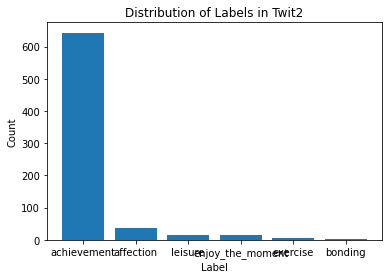

In [ ]:
label_counts = twit2['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Twit2')
plt.show()

In [ ]:
happydb['predicted_category']

0                affection
1                affection
2                 exercise
3                  bonding
4                affection
                ...       
100530           affection
100531    enjoy_the_moment
100532           affection
100533             bonding
100534            exercise
Name: predicted_category, Length: 100535, dtype: object

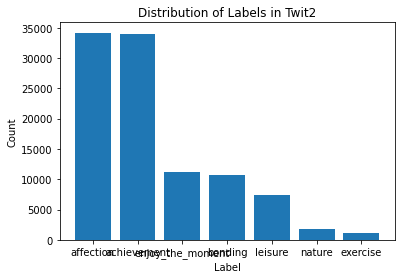

In [ ]:
label_counts = happydb['predicted_category'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Twit2')
plt.show()

# Save Model

In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined